# Aprendizagem Automática: Aprendizagem não supervisionada

Em Python, a biblioteca [scikit-learn](https://scikit-learn.org/) é uma das mais usadas para aprendizagem automática:

In [1]:
import sklearn

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme() 

## Manipulação de dados

Para além de implementações eficientes de algoritmos de aprendizagem automática, a biblioteca *scikit-learn* também disponibiliza algumas funcionalidades de manipulação de dados relevantes no contexto da aplicação desses algoritmos. Por exemplo, normalização e redução de dimensionalidade. Para demonstrar algumas destas funcionalidades, vamos usar o conjunto de dados [Iris](https://archive.ics.uci.edu/dataset/53/iris) que já vimos anteriormente:

In [3]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
25,5.0,3.0,1.6,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica
135,7.7,3.0,6.1,2.3,virginica
137,6.4,3.1,5.5,1.8,virginica


**Nota**: O método `sample` escolhe aleatoriamente uma amostra de *n* exemplos do conjunto de dados.

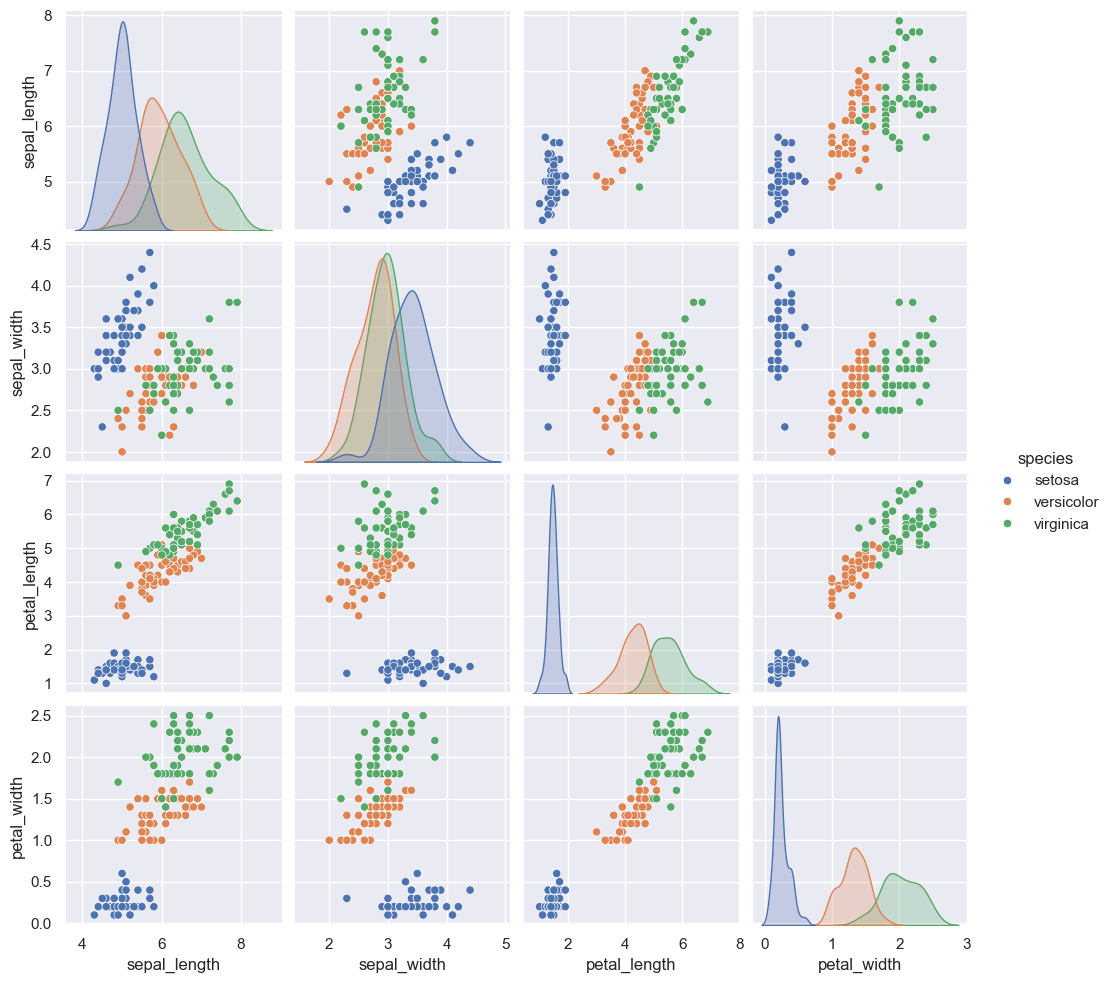

In [4]:
sns.pairplot(iris, hue='species');

Num contexto de aprendizagem não supervisionada, a espécie de planta serve apenas como uma indicação de uma possível separação dos dados que tem um significado conhecido no mundo real. Para além disso, mesmo que estivessemos num contexto de aprendizagem supervisionada, a biblioteca *scikit-learn* lida separadamente com os atributos usados para representar os dados e aquele ou aqueles que representam o que se pretende prever. Como tal, para simplificar a aplicação das funções da biblioteca, vamos criar uma nova tabela de dados sem o atributo `species`:

In [5]:
iris_features = iris.drop(columns=['species'])
iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Nota**: A subdivisão dos exemplos por espécie de planta vai continuar a ser usada como apoio em algumas visualizações.

### Normalização

A normalização dos valores dos atributos pode ter um impacto relevante quando estes têm escalas diferentes. A classe `StandardScaler` da biblioteca *scikit-learn* pode ser usada para fazer normalização baseada em z-score, isto é, transformar os atributos de forma a que a distribuição dos seus valores tenha média zero e desvio padrão unitário.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std_scaler = StandardScaler()
std_scaler.fit(iris_features)
scaled_features = std_scaler.transform(iris_features)
std_scaled_iris = pd.DataFrame(scaled_features, index=iris_features.index, columns=iris_features.columns)
std_scaled_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


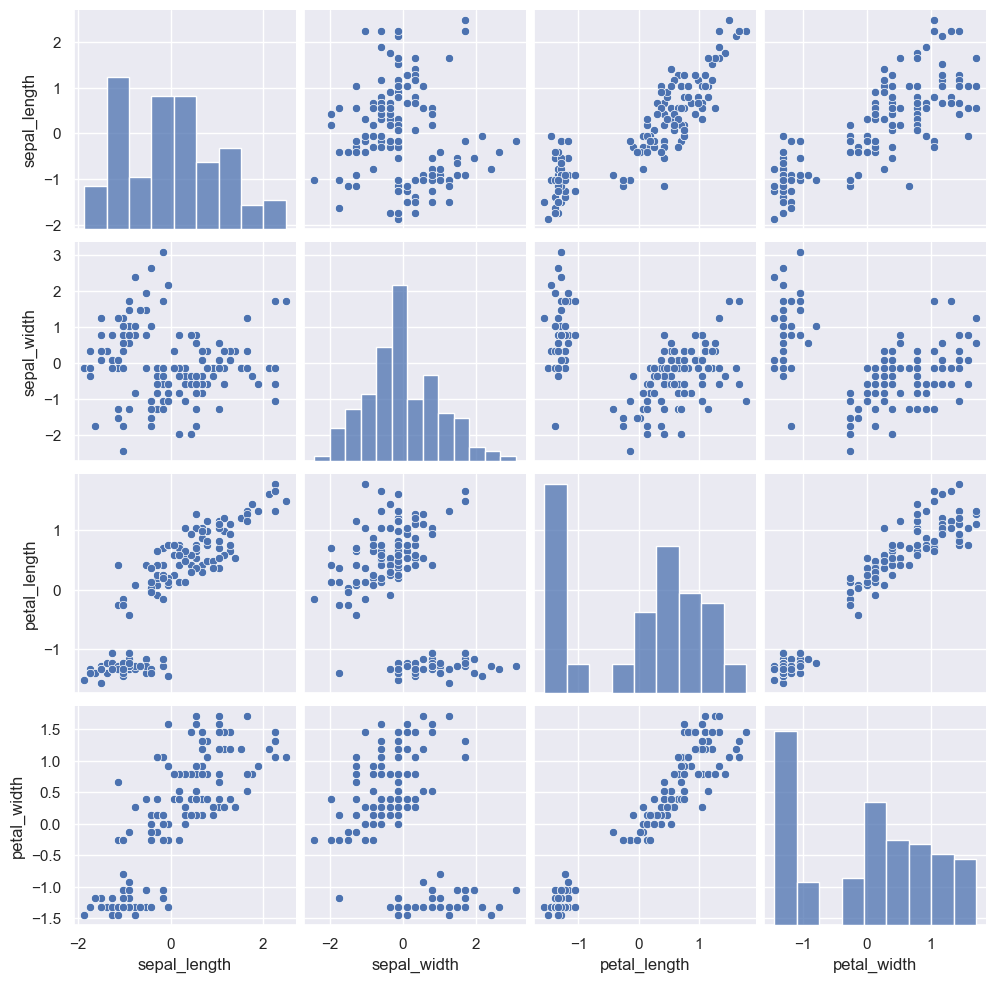

In [8]:
sns.pairplot(std_scaled_iris);

**Nota**: O método `fit` é usado para ajustar o normalizador, isto é, extrair dos dados a informação necessária para fazer a normalização (neste caso, a média e o desvio padrão de cada atributo), enquanto o método `transform` é usado para aplicar a normalização. O método `transform` pode ser aplicado sobre exemplos diferentes daqueles que foram usados para ajustar o normalizador. Isto permite normalizar novos dados da mesma forma que os do conjunto de dados original. O método `fit_transform` pode ser usado para efetuar as duas operações sequencialmente sobre o mesmo conjunto de dados, o que é conveniente em muitos casos.

Outra abordagem de normalização é escalar os valores dos atributos de forma a que estes fiquem dentro de um determinado intervalo, como por exemplo entre 0 e 1. Isso pode ser feito usando a funcionalidade da classe `MinMaxScaler`:

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
minmax_scaler = MinMaxScaler((0, 1))
minmax_scaled_iris = pd.DataFrame(minmax_scaler.fit_transform(iris_features), index=iris_features.index, columns=iris_features.columns)
minmax_scaled_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


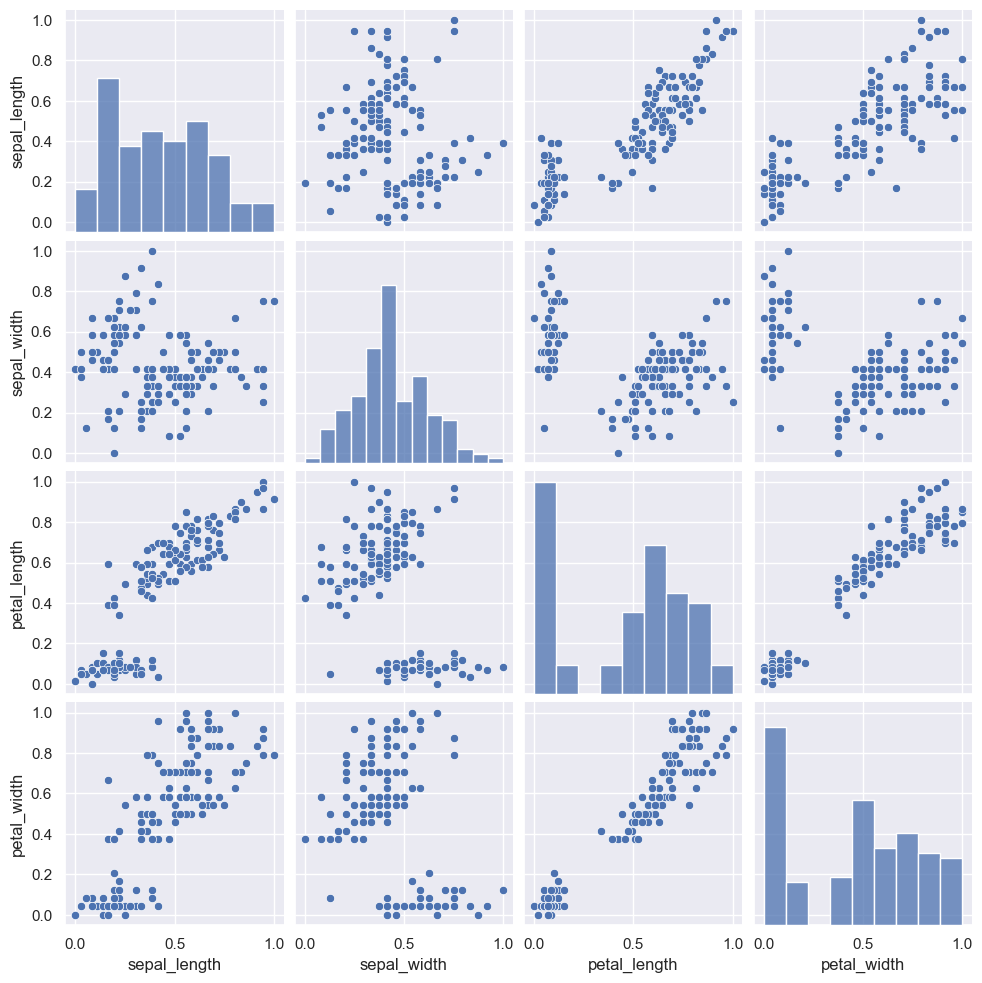

In [11]:
sns.pairplot(minmax_scaled_iris);

### Redução de dimensionalidade

Muitas vezes é necessário reduzir a dimensionalidade de um conjunto de dados para o conseguir analisar, visualizar, ou até mesmo para melhorar o desempenho de modelos de aprendizagem automática obtidos a partir desses dados. Existem várias abordagens para reduzir a dimensionalidade, sendo as mais comuns baseadas na seleção de um subconjunto representativo dos exemplos e/ou atributos originais de acordo com um determinado critério. Outra abordagem possível é fazer uma análise de componentes principais ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)) e usar como atributos os componentes que refletem a maior variância no conjunto de dados. Para isso, pode ser usada a classe `PCA` da biblioteca *scikit-learn*:

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(iris_features)
pca_iris = pd.DataFrame(pca.transform(iris_features), index=iris_features.index, columns=['PC1', 'PC2'])
pca_iris.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


**Nota**: Neste caso, escolhemos os dois componentes principais, o que nos ajuda a visualizar o conjunto de dados. Esta é uma abordagem comum, mesmo em casos em que os atributos originais são usados para fazer a restante análise do conjunto de dados.

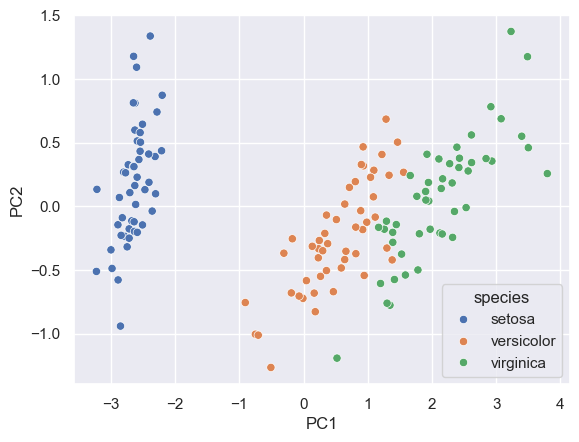

In [15]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['species']);

Para verificar se os componentes selecionados são suficientemente representativos do conjunto de dados, podemos olhar para o rácio da variância total no conjunto de dados que estes explicam. Esta informação é dada pelo atributo `explained_variance_ratio_`:

In [17]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum() * 100)

[0.92461872 0.05306648]
97.7685206318795


Neste caso, podemos verificar que os dois componentes explicam perto de 98% da variância total no conjunto de dados.

## Agrupamentos (*Clustering*)

### k-Means

Euclidean

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(iris_features)

**Nota**: A implementação do algoritmo k-Means na biblioteca *scikit-learn* inclui algumas otimizações. Por exemplo, a forma predefinida para escolha dos centroides iniciais segue o algoritmo [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B). Para além disso, esta implementação só permite o uso da distância euclidiana como função de distância.

Os centroides dos clusters obtidos e as atribuições dos exemplos aos clusters são dados pelos atributos `cluster_centers_` e `labels_`, respectivamente: 

In [21]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Vamos guardar este agrupamento na tabela de dados para podermos visualizá-lo e compará-lo com os obtidos usando os outros algoritmos: 

In [23]:
iris['kmeans'] = pd.Categorical(kmeans.labels_)

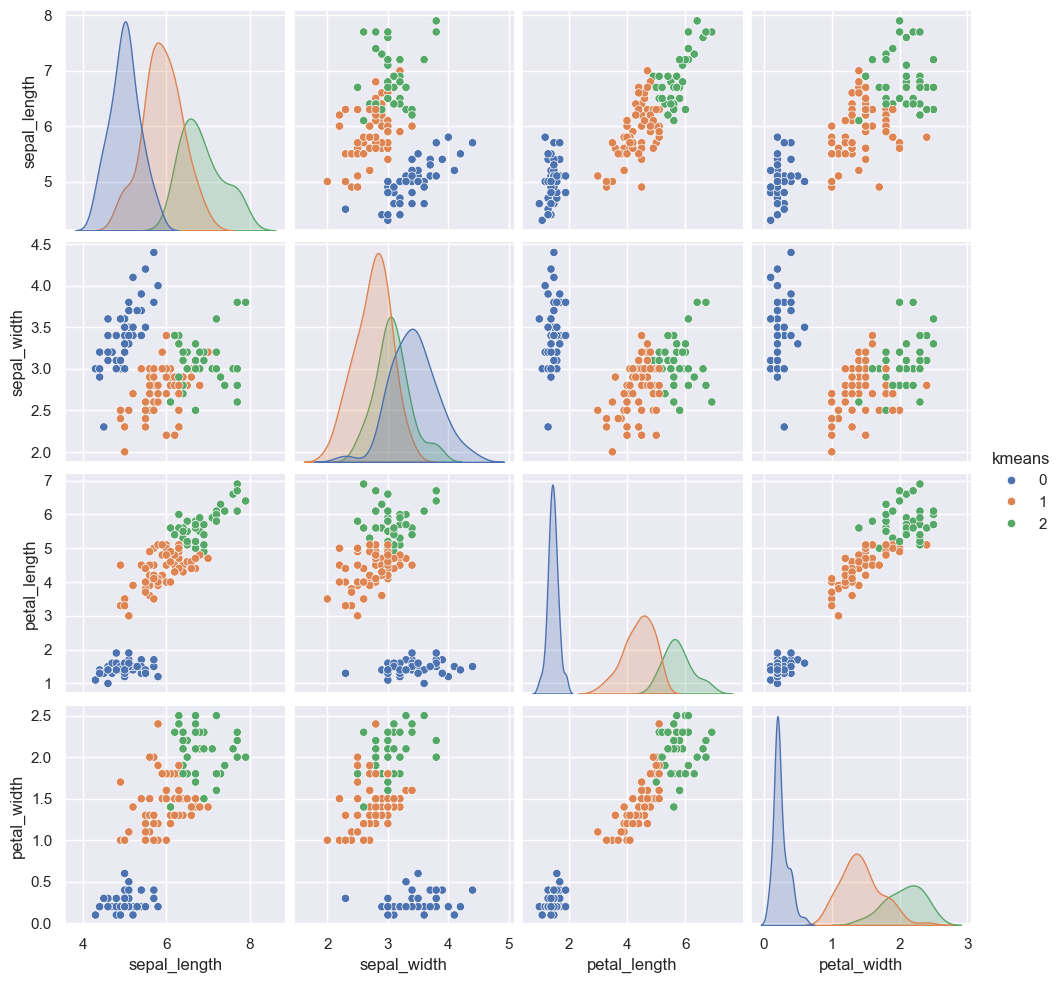

In [24]:
sns.pairplot(iris, hue='kmeans');

Também podemos visualizar o agrupamento usando a projeção nos dois componentes principais obtidos através da aplicação de [PCA](#Redução-de-dimensionalidade):

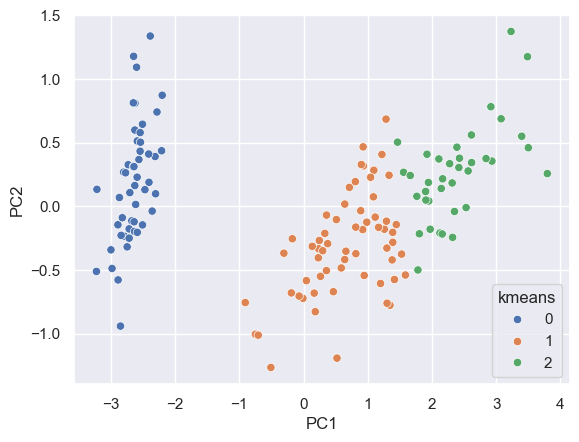

In [26]:
sns.scatterplot(pca_iris, x='PC1', y='PC2', hue=iris['kmeans']);

O atributo `inertia_` guarda o valor da soma dos quadrados das distâncias de cada exemplo ao centroide do seu cluster (*within-cluster sum of squares*):

In [27]:
kmeans.inertia_

78.85144142614601

Podemos usar esta informação para analisar a qualidade do agrupamento para vários valores de *k*:

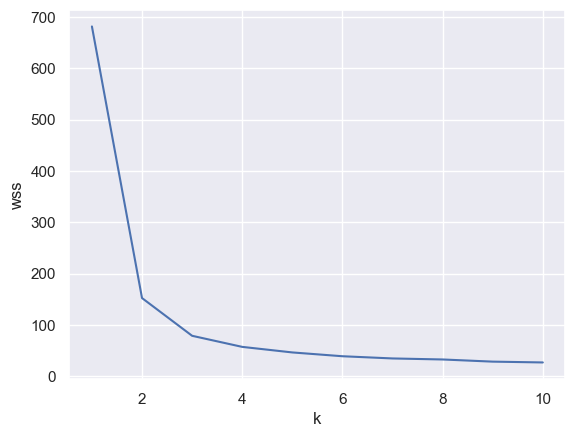

In [28]:
k_wss = pd.DataFrame([(k, KMeans(n_clusters=k, n_init='auto').fit(iris_features).inertia_) for k in range(1, 11)], columns=['k', 'wss'])
sns.lineplot(k_wss, x='k', y='wss');

Usando o método do "cotovelo" podemos concluir que *k=3* é um valor adequado para o número de clusters.

### Agrupamento hierárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3).fit(iris_features)

In [ ]:
hierarchical.labels_

In [ ]:
iris['hierarchical'] = pd.Categorical(hierarchical.labels_)

In [ ]:
sns.pairplot(iris, hue='hierarchical');

In [ ]:
sns.scatterplot(transformed_iris, x='PC1', y='PC2', hue=iris['hierarchical']);

A forma como a distância entre dois clusters é calculada pode ser definida usando o argumento `linkage`. Por predefinição, é usado o [método de Ward](https://en.wikipedia.org/wiki/Ward%27s_method). Outras opções são `'average'`, `'single'` e `'complete'`. Por exemplo, usar a distância mínima entre pontos dos dois clusters (`'single'`) leva a resultados significativamente diferentes:

In [ ]:
hierarchical_single_link = AgglomerativeClustering(n_clusters=3, linkage='single').fit(iris_features)
sns.scatterplot(transformed_iris, x='PC1', y='PC2', hue=hierarchical_single_link.labels_);

In [ ]:
hierarchical_full = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(iris_features)

Como podemos visualizar?

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plot_dendrogram(hierarchical_full)

Podemos cortar pelo número de clusters

In [ ]:
plot_dendrogram(hierarchical_full, truncate_mode='lastp', p=10)

Ou pelo nível da árvore:

In [ ]:
plot_dendrogram(hierarchical_full, truncate_mode='level', p=5)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(iris_features)

In [ ]:
dbscan.labels_

-1 representam os exemplos que não foram incluídos num cluster

In [ ]:
iris['dbscan'] = pd.Categorical(dbscan.labels_)

In [ ]:
sns.pairplot(iris, hue='dbscan');

In [ ]:
sns.scatterplot(transformed_iris, x='PC1', y='PC2', hue=iris['dbscan']);

Alterar função de distância:

In [ ]:
dbscan_manhattan = DBSCAN(eps=0.5, min_samples=5, metric='manhattan').fit(iris_features)

In [ ]:
sns.scatterplot(transformed_iris, x='PC1', y='PC2', hue=dbscan_manhattan.labels_);

**Nota**: [Funções disponíveis](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)

### Avaliação

In [ ]:
import sklearn.metrics

Silhueta:

In [ ]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.silhouette_score(iris_features, iris[c])}')

Calinski-Harabasz Index:

In [ ]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.calinski_harabasz_score(iris_features, iris[c])}')

Davies-Bouldin Index:

In [ ]:
for c in ['kmeans', 'hierarchical', 'dbscan']:
    print(f'{c}: {sklearn.metrics.davies_bouldin_score(iris_features, iris[c])}')

### Exemplos adicionais

In [ ]:
import sklearn.datasets

In [ ]:
moons = pd.DataFrame(sklearn.datasets.make_moons(n_samples=1000, noise=0.05)[0], columns=['x', 'y'])
sns.scatterplot(moons, x='x', y='y');

In [ ]:
moons_clustering = {
    'kmeans': KMeans(n_clusters=2, n_init='auto').fit(moons).labels_,
    'hierarchical': AgglomerativeClustering(n_clusters=2).fit(moons).labels_,
    'dbscan': DBSCAN(eps=0.25, min_samples=5).fit(moons).labels_
}

for m, c in moons_clustering.items():
    sns.scatterplot(moons, x='x', y='y', hue=c).set(title=m)
    plt.show() # This is used to force every plot to be shown instead of just the last one

In [ ]:
blobs = pd.DataFrame(sklearn.datasets.make_blobs(n_samples=1000, random_state=1000)[0], columns=['x', 'y'])
sns.scatterplot(blobs, x='x', y='y');

**Nota**: O argumento `random_state` é usado para que o resultado seja reprodutível. Este pode ser usado na maioria das funções definidas pela biblioteca *scikit-learn* que envolvem algum tipo de aleatoriedade.

In [ ]:
blobs_clustering = {
    'kmeans': KMeans(n_clusters=3, n_init='auto').fit(blobs).labels_,
    'hierarchical': AgglomerativeClustering(n_clusters=3).fit(blobs).labels_,
    'dbscan': DBSCAN(eps=0.5, min_samples=5).fit(blobs).labels_
}

for m, c in blobs_clustering.items():
    sns.scatterplot(blobs, x='x', y='y', hue=c).set(title=m)
    plt.show() # This is used to force every plot to be shown instead of just the last one